# Libraries

In [47]:
from datasets import load_dataset, concatenate_datasets
import json
import matplotlib.pyplot as plt

Configurations

In [36]:
with open('config.json', 'r', encoding='utf-8') as file:
    data_config = json.load(file)

print(json.dumps(data_config, indent=2, ensure_ascii=False))

{
  "squad": {
    "train_portion": 0.8,
    "val_portion": 1.0
  },
  "wmt16_en_de": {
    "train_portion": 0.03,
    "val_portion": 1.0
  },
  "imdb": {
    "train_portion": 0.8,
    "val_portion": 1.0
  }
}


# Squad Dataset

In [16]:
squad_dataset = load_dataset('squad')

print(f"Train samples: {len(squad_dataset['train'])}.")
print(f"Validation samples: {len(squad_dataset['validation'])}.")

Train samples: 87599.
Validation samples: 10570.


In [17]:
print(json.dumps(squad_dataset['train'][0], indent=2, ensure_ascii=False))

{
  "id": "5733be284776f41900661182",
  "title": "University_of_Notre_Dame",
  "context": "Architecturally, the school has a Catholic character. Atop the Main Building's gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend \"Venite Ad Me Omnes\". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.",
  "question": "To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?",
  "answers": {
    "text": [
      "Saint Bernadette Soubirous"
    ],
    "answer_start": [
      515
    ]
  }
}


In [18]:
squad_dataset['train'] = squad_dataset['train'].select(range(int(data_config['squad']['train_portion'] * len(squad_dataset['train']))))
squad_dataset['validation'] = squad_dataset['validation'].select(range(int(data_config['squad']['val_portion'] * len(squad_dataset['validation']))))

split_squad = squad_dataset['train'].train_test_split(test_size=0.2, seed=42)

squad_train = split_squad['train']
squad_test  = split_squad['test']
squad_val   = squad_dataset['validation']

print(f"""Squad training samples: {len(squad_train)}.
Squad test samples: {len(squad_test)}.
Squad validation samples: {len(squad_val)}.
""")

Squad training samples: 56063.
Squad test samples: 14016.
Squad validation samples: 10570.



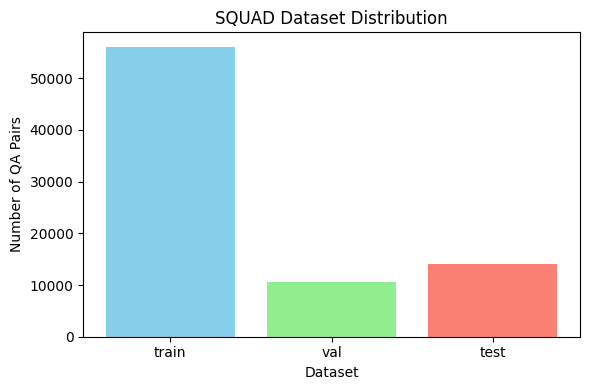

In [ ]:
sizes_squad = {
    'train': len(squad_train),
    'val': len(squad_val),
    'test': len(squad_test)
}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(sizes_squad.keys(), sizes_squad.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('SQUAD Dataset Distribution')
plt.xlabel('Dataset')
plt.ylabel('Number of QA Pairs')
plt.tight_layout()
plt.show()

# WMT16-En-De Dataset

In [37]:
wmt_dataset = load_dataset('wmt16', 'de-en')

print(f"Train samples: {len(wmt_dataset['train'])}.")
print(f"Validation samples: {len(wmt_dataset['validation'])}.")

Train samples: 4548885.
Validation samples: 2169.


In [38]:
print(json.dumps(wmt_dataset['validation'][0], indent=2, ensure_ascii=False))

{
  "translation": {
    "de": "Die Premierminister Indiens und Japans trafen sich in Tokio.",
    "en": "India and Japan prime ministers meet in Tokyo"
  }
}


In [39]:
wmt_dataset['train'] = wmt_dataset['train'].select(range(int(data_config['wmt16_en_de']['train_portion'] * len(wmt_dataset['train']))))
wmt_dataset['validation'] = wmt_dataset['validation'].select(range(int(data_config['wmt16_en_de']['val_portion'] * len(wmt_dataset['validation']))))

split_wmt = wmt_dataset['train'].train_test_split(test_size=0.2, seed=42)

wmt_train = split_wmt['train']
wmt_test  = split_wmt['test']
wmt_val   = squad_dataset['validation']

print(f"""Squad training samples: {len(wmt_train)}.
Squad test samples: {len(wmt_test)}.
Squad validation samples: {len(wmt_val)}.
""")

Squad training samples: 109172.
Squad test samples: 27294.
Squad validation samples: 10570.



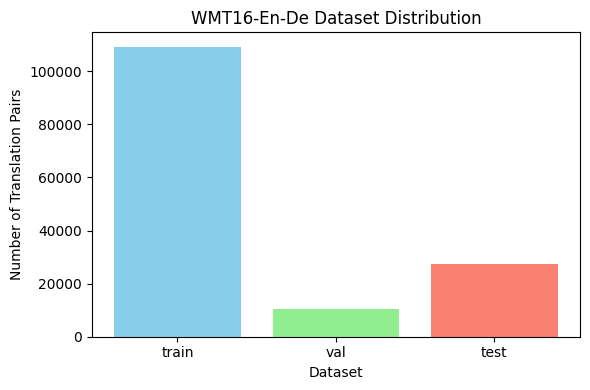

In [42]:
sizes_wmt = {
    'train': len(wmt_train),
    'val': len(wmt_val),
    'test': len(wmt_test)
}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(sizes_wmt.keys(), sizes_wmt.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('WMT16-En-De Dataset Distribution')
plt.xlabel('Dataset')
plt.ylabel('Number of Translation Pairs')
plt.tight_layout()
plt.show()

# IMDB Dataset

In [50]:
imdb_dataset = load_dataset('imdb')

half_index = len(imdb_dataset['test']) // 2
imdb_dataset = {
    'train': concatenate_datasets([imdb_dataset['train'], imdb_dataset['test'].select(range(half_index, len(imdb_dataset['test'])))]),
    'validation': imdb_dataset['test'].select(range(half_index))
}

print(f"Train samples: {len(imdb_dataset['train'])}.")
print(f"Validation samples: {len(imdb_dataset['validation'])}.")

Train samples: 37500.
Validation samples: 12500.


In [51]:
print(json.dumps(imdb_dataset['validation'][0], indent=2, ensure_ascii=False))

{
  "text": "I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting. (I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it's rubbish as they 

In [52]:
imdb_dataset['train'] = imdb_dataset['train'].select(range(int(data_config['imdb']['train_portion'] * len(imdb_dataset['train']))))
imdb_dataset['validation'] = imdb_dataset['validation'].select(range(int(data_config['imdb']['val_portion'] * len(imdb_dataset['validation']))))

split_imdb = imdb_dataset['train'].train_test_split(test_size=0.2, seed=42)

imdb_train = split_imdb['train']
imdb_test  = split_imdb['test']
imdb_val   = imdb_dataset['validation']

print(f"""Squad training samples: {len(imdb_train)}.
Squad test samples: {len(imdb_test)}.
Squad validation samples: {len(imdb_val)}.
""")

Squad training samples: 24000.
Squad test samples: 6000.
Squad validation samples: 12500.



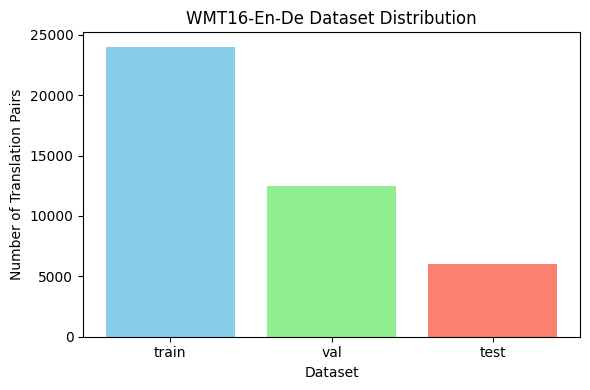

In [53]:
sizes_imdb = {
    'train': len(imdb_train),
    'val': len(imdb_val),
    'test': len(imdb_test)
}

# Plot
plt.figure(figsize=(6, 4))
plt.bar(sizes_imdb.keys(), sizes_imdb.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('WMT16-En-De Dataset Distribution')
plt.xlabel('Dataset')
plt.ylabel('Number of Translation Pairs')
plt.tight_layout()
plt.show()